In [54]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import yfinance as yf

In [55]:
base_path = os.getcwd()
file_path = os.path.join(base_path, "outputs", "analysis.csv")

In [56]:
df = pd.read_csv("outputs/analysis.csv")

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date').sort_index()

print(df.head())
print(df.shape)
print(df.dtypes)

             Open_Gold   High_Gold    Low_Gold  Close_Gold  Volume_Gold  \
Date                                                                      
2014-11-30  112.389999  115.959999  109.669998  112.110001    147594200   
2014-12-31  113.800003  118.989998  112.410004  113.580002    153722200   
2015-01-31  112.489998  125.580002  112.320000  123.449997    198034100   
2015-02-28  121.839996  123.160004  114.290001  116.160004    125686200   
2015-03-31  116.500000  116.639999  109.769997  113.660004    133483100   

              Open_BTC    High_BTC     Low_BTC   Close_BTC  Volume_BTC  ...  \
Date                                                                    ...   
2014-11-30  325.569000  457.092987  325.076996  376.446991   510335700  ...   
2014-12-31  378.248993  384.037994  304.231995  320.192993   442700500  ...   
2015-01-31  314.079010  315.838989  171.509995  226.425003   814700262  ...   
2015-02-28  226.490997  256.653015  214.725006  253.828003   463441700  ...   


In [57]:

# Compute log returns
cols = ["Close_BTC", "Close_Gold", "Close_SP500"]

returns = np.log(df[cols] / df[cols].shift(1)).dropna()

# Pearson 
correlation_btc = returns["Close_BTC"].corr(returns["Close_SP500"])
correlation_gold = returns["Close_Gold"].corr(returns["Close_SP500"])

print("BTC vs SP500 (Pearson):", correlation_btc)
print("Gold vs SP500 (Pearson):", correlation_gold)

# Spearman 
correlation_btc_s = returns["Close_BTC"].corr(returns["Close_SP500"], method="spearman")
correlation_gold_s = returns["Close_Gold"].corr(returns["Close_SP500"], method="spearman")

print("BTC vs SP500 (Spearman):", correlation_btc_s)
print("Gold vs SP500 (Spearman):", correlation_gold_s)


BTC vs SP500 (Pearson): 0.3727117325270751
Gold vs SP500 (Pearson): 0.051856665850373886
BTC vs SP500 (Spearman): 0.3615115207373271
Gold vs SP500 (Spearman): 0.07255913978494623


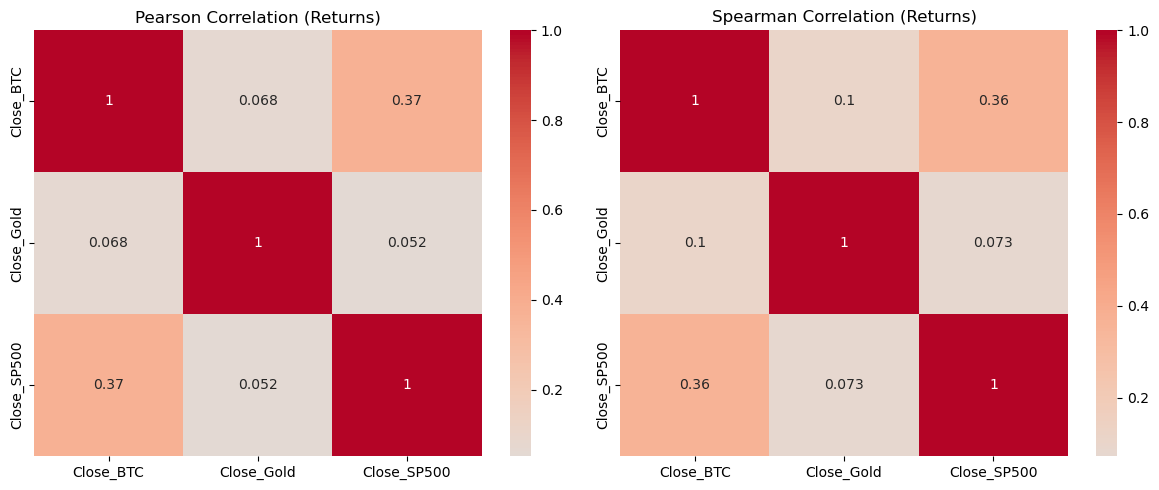

In [58]:

# Pearson correlation matrix 
corr_pearson = returns.corr(method="pearson")

# Spearman correlation matrix 
corr_spearman = returns.corr(method="spearman")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(corr_pearson, annot=True, cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("Pearson Correlation (Returns)")

sns.heatmap(corr_spearman, annot=True, cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("Spearman Correlation (Returns)")

plt.tight_layout()
plt.show()


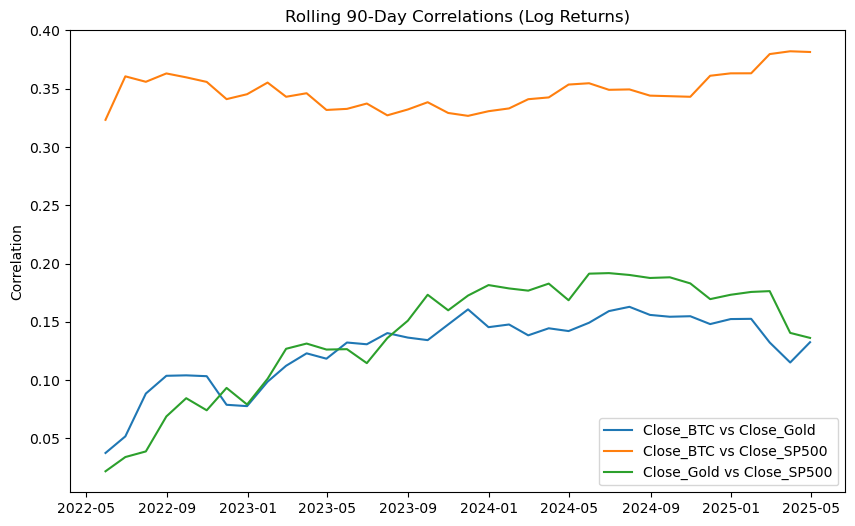

In [59]:

window = 90  # rolling window size (90 days)

pairs = [("Close_BTC", "Close_Gold"),
         ("Close_BTC", "Close_SP500"),
         ("Close_Gold", "Close_SP500")]

fig, ax = plt.subplots(figsize=(10, 6))

for x, y in pairs:
    rolling_corr = returns[x].rolling(window).corr(returns[y])
    ax.plot(rolling_corr, label=f"{x} vs {y}")

ax.set_title(f"Rolling {window}-Day Correlations (Log Returns)")
ax.set_ylabel("Correlation")
ax.legend()
plt.show()

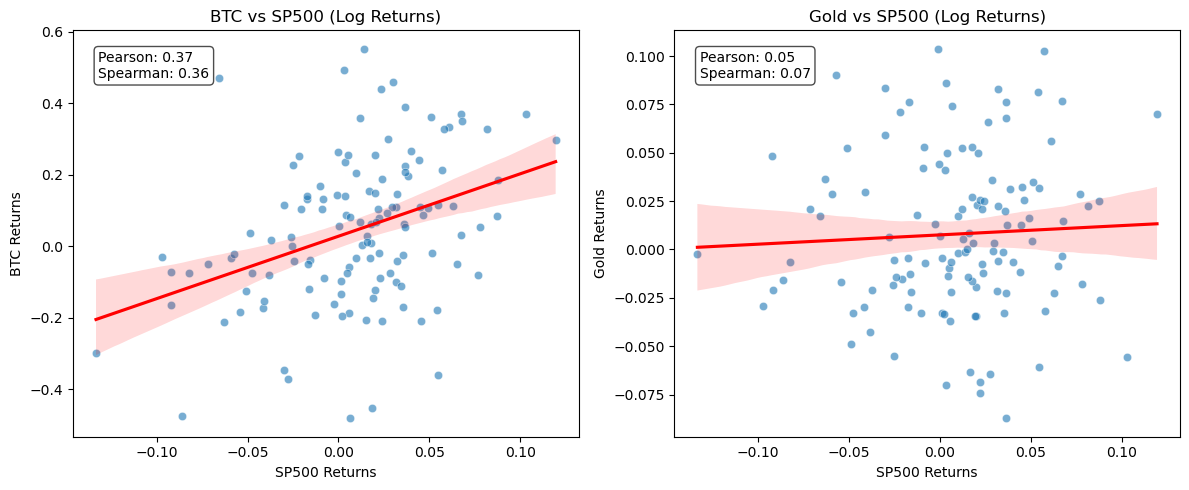

In [60]:

corr_gold_p = returns["Close_Gold"].corr(returns["Close_SP500"], method="pearson")
corr_gold_s = returns["Close_Gold"].corr(returns["Close_SP500"], method="spearman")

corr_btc_s = returns["Close_BTC"].corr(returns["Close_SP500"], method="spearman")
corr_btc_p = returns["Close_BTC"].corr(returns["Close_SP500"], method="pearson")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# BTC vs SP500
sns.scatterplot(x=returns["Close_SP500"], y=returns["Close_BTC"], ax=axes[0], alpha=0.6)
sns.regplot(x=returns["Close_SP500"], y=returns["Close_BTC"], ax=axes[0], scatter=False, color="red")
axes[0].set_title("BTC vs SP500 (Log Returns)")
axes[0].set_xlabel("SP500 Returns")
axes[0].set_ylabel("BTC Returns")
axes[0].text(0.05, 0.95, f"Pearson: {corr_btc_p:.2f}\nSpearman: {corr_btc_s:.2f}",
             transform=axes[0].transAxes, fontsize=10, verticalalignment="top",
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))

# Gold vs SP500
sns.scatterplot(x=returns["Close_SP500"], y=returns["Close_Gold"], ax=axes[1], alpha=0.6)
sns.regplot(x=returns["Close_SP500"], y=returns["Close_Gold"], ax=axes[1], scatter=False, color="red")
axes[1].set_title("Gold vs SP500 (Log Returns)")
axes[1].set_xlabel("SP500 Returns")
axes[1].set_ylabel("Gold Returns")
axes[1].text(0.05, 0.95, f"Pearson: {corr_gold_p:.2f}\nSpearman: {corr_gold_s:.2f}",
             transform=axes[1].transAxes, fontsize=10, verticalalignment="top",
             bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))

plt.tight_layout()
plt.show()


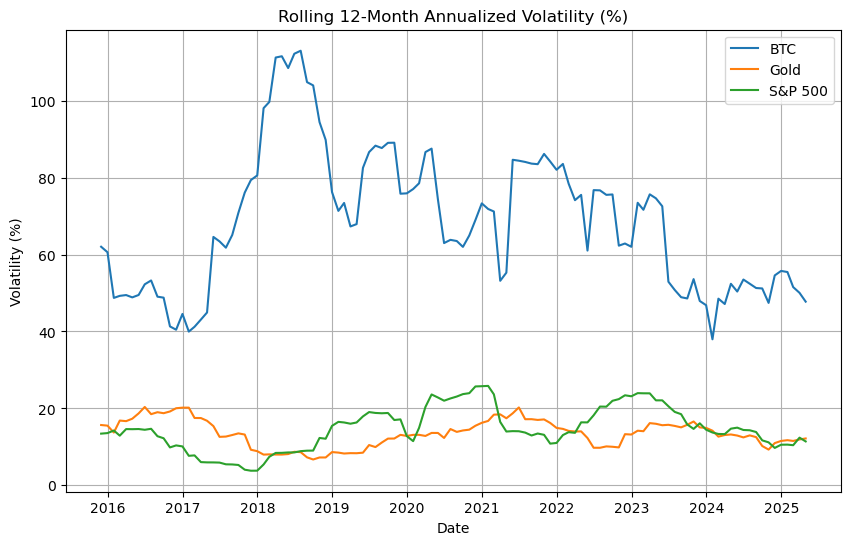

In [61]:

# Rolling window (12 months ≈ 1 year)
window = 12  

# Calculate rolling annualized volatility for monthly data (%)
rolling_vol = returns.rolling(window).std() * np.sqrt(12) * 100

# Plot
plt.figure(figsize=(10,6))
plt.plot(rolling_vol.index, rolling_vol["Close_BTC"], label="BTC")
plt.plot(rolling_vol.index, rolling_vol["Close_Gold"], label="Gold")
plt.plot(rolling_vol.index, rolling_vol["Close_SP500"], label="S&P 500")

plt.title(f"Rolling {window}-Month Annualized Volatility (%)")
plt.ylabel("Volatility (%)")
plt.xlabel("Date")
plt.legend()
plt.grid(True)
plt.show()


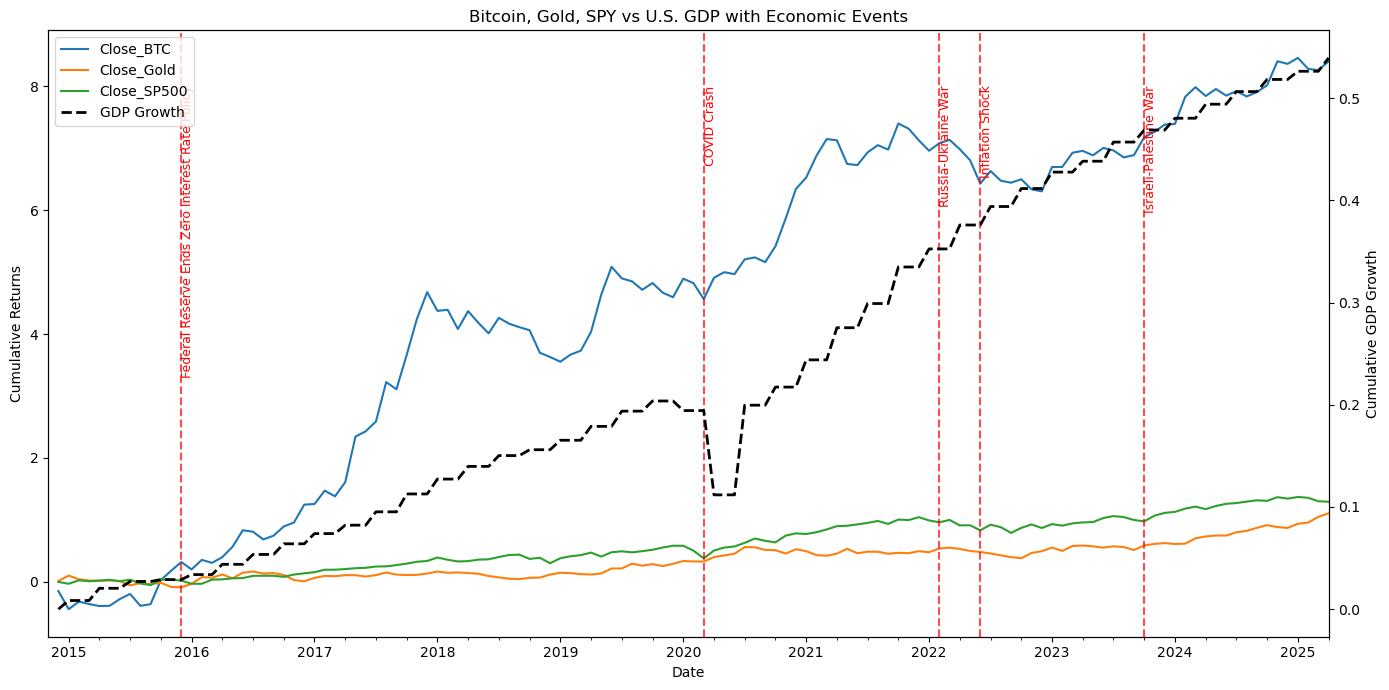

In [62]:
# Compute returns (monthly, to match GDP frequency)
assets = ['Close_BTC','Close_Gold','Close_SP500']
monthly_returns = df[assets].pct_change()
gdp_returns = df['GDP'].pct_change()  

fig, ax1 = plt.subplots(figsize=(14,7))

monthly_returns[['Close_BTC','Close_Gold','Close_SP500']].cumsum().plot(ax=ax1, linewidth=1.5)
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("Bitcoin, Gold, SPY vs U.S. GDP with Economic Events")

ax2 = ax1.twinx()
gdp_returns.cumsum().plot(ax=ax2, color="black", linestyle="--", linewidth=2, label="GDP Growth")
ax2.set_ylabel("Cumulative GDP Growth")

# Add major economic events 
events = {
    "Federal Reserve Ends Zero Interest Rate Policy": "2015-12-16",
    "COVID Crash": "2020-03-01",
    " Russia-Ukraine War": "2022-02-24",
    "Inflation Shock": "2022-06-01",
    "Israeli-Palestine War": "2023-10-07"
}



for label, date in events.items():
    ax1.axvline(pd.to_datetime(date), color="red", linestyle="--", alpha=0.7)
    ax1.text(pd.to_datetime(date), ax1.get_ylim()[1]*0.9, label,
             rotation=90, verticalalignment='top', color="red", fontsize=9)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

plt.tight_layout()
plt.show() 

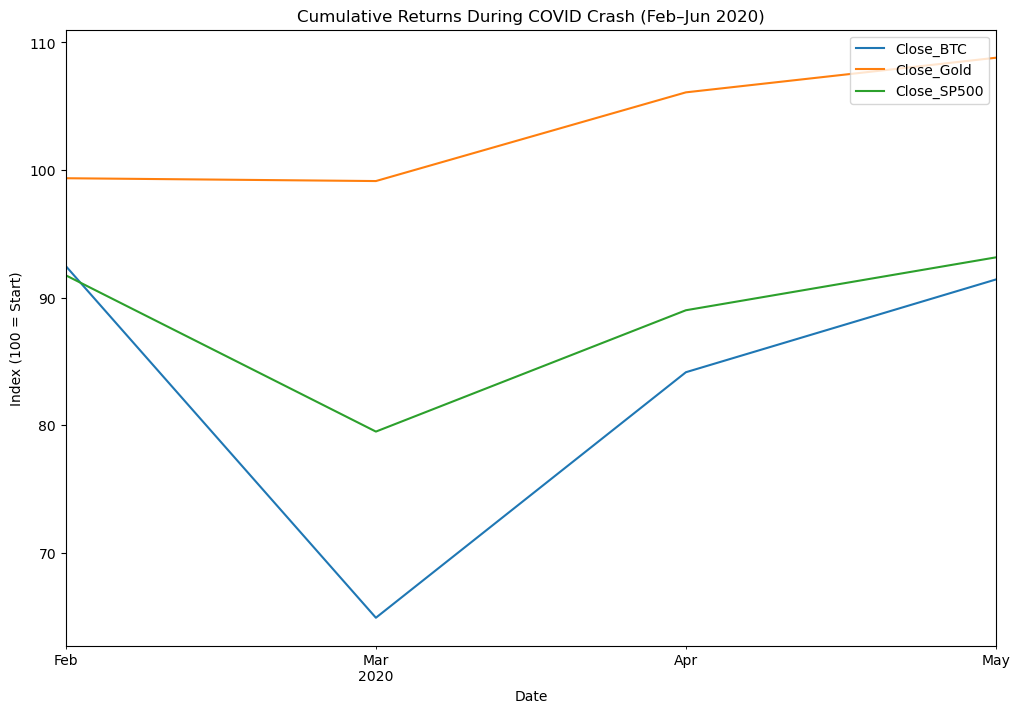

In [63]:
event_start = "2020-02-01"
event_end = "2020-06-01"
event_data = returns.loc[event_start:event_end]  # simple returns
cum_event = (event_data + 1).cumprod() * 100    # cumulative index starting at 100

fig, ax = plt.subplots(figsize=(12, 8))
cum_event.plot(ax=ax)
ax.set_title("Cumulative Returns During COVID Crash (Feb–Jun 2020)")
ax.set_ylabel("Index (100 = Start)")
ax.legend(loc="upper right")
plt.show()


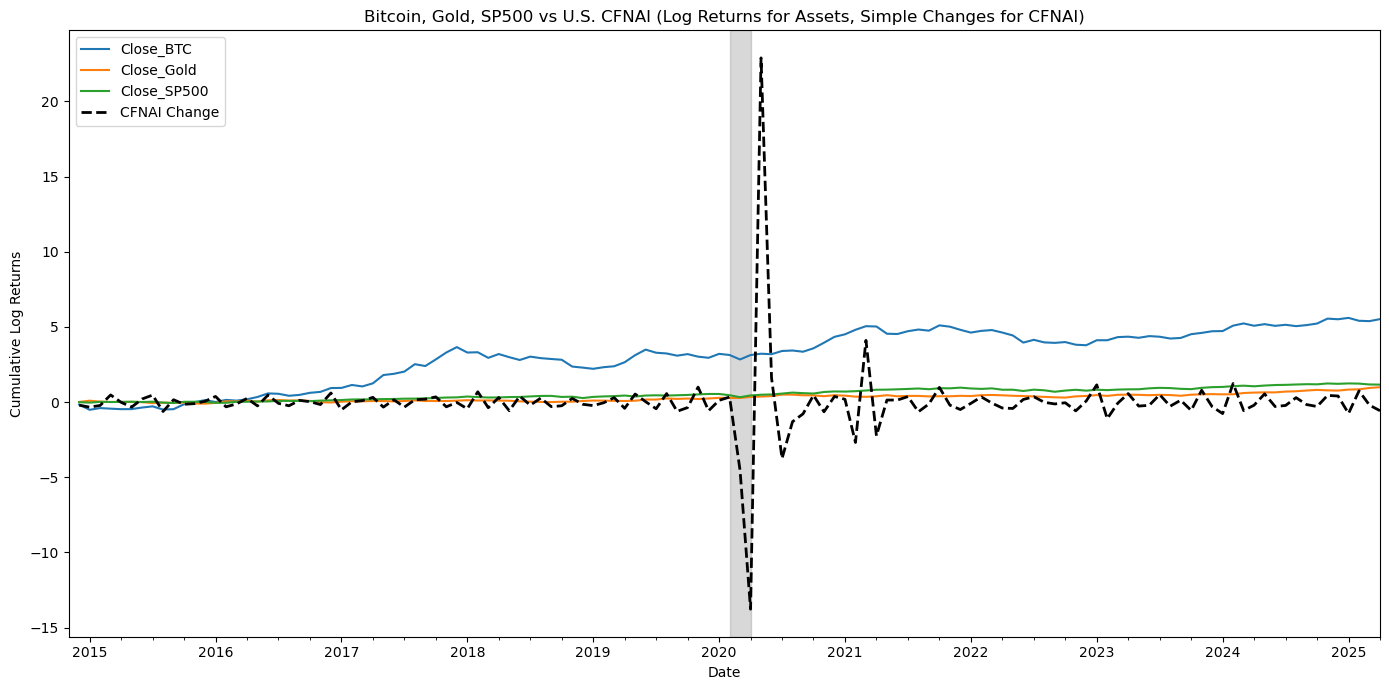

In [64]:
#Assets log returns vs CFNAI changes

monthly_returns = np.log(df[assets] / df[assets].shift(1))

cfnai_changes = df['CFNAI'].diff()

fig, ax1 = plt.subplots(figsize=(14,7))


(monthly_returns.cumsum()).plot(ax=ax1, linewidth=1.5)
ax1.set_ylabel("Cumulative Log Returns")
ax1.set_title("Bitcoin, Gold, SP500 vs U.S. CFNAI (Log Returns for Assets, Simple Changes for CFNAI)")

cfnai_changes.plot(ax=ax1, color="black", linestyle="--", linewidth=2, label="CFNAI Change")

recessions = [
    ("2020-02-01", "2020-04-01"),   # COVID recession
]

for start, end in recessions:
    ax1.axvspan(pd.to_datetime(start), pd.to_datetime(end), color="gray", alpha=0.3)

ax1.legend(loc="upper left")

plt.tight_layout()
plt.show()


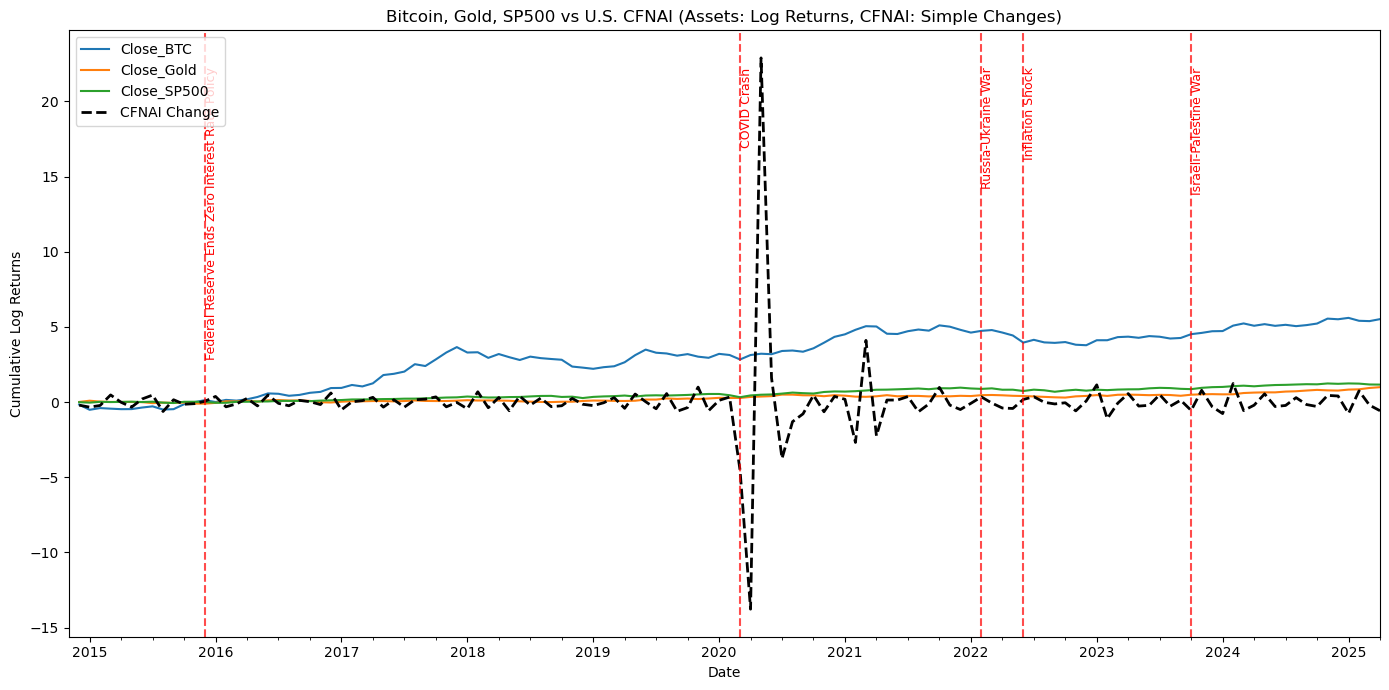

In [65]:

fig, ax1 = plt.subplots(figsize=(14,7))

(monthly_returns.cumsum()).plot(ax=ax1, linewidth=1.5)
ax1.set_ylabel("Cumulative Log Returns")
ax1.set_title("Bitcoin, Gold, SP500 vs U.S. CFNAI (Assets: Log Returns, CFNAI: Simple Changes)")


cfnai_changes.plot(ax=ax1, color="black", linestyle="--", linewidth=2, label="CFNAI Change")


events = {
    "Federal Reserve Ends Zero Interest Rate Policy": "2015-12-16",
    "COVID Crash": "2020-03-01",
    " Russia-Ukraine War": "2022-02-24",
    "Inflation Shock": "2022-06-01",
    "Israeli-Palestine War": "2023-10-07"
}

for label, date in events.items():
    ax1.axvline(pd.to_datetime(date), color="red", linestyle="--", alpha=0.7)
    ax1.text(pd.to_datetime(date), ax1.get_ylim()[1]*0.9, label,
             rotation=90, verticalalignment='top', color="red", fontsize=9)

ax1.legend(loc="upper left")

plt.tight_layout()
plt.show()


Average daily BTC volume in 2024 (USD): $37,439,093,696.19


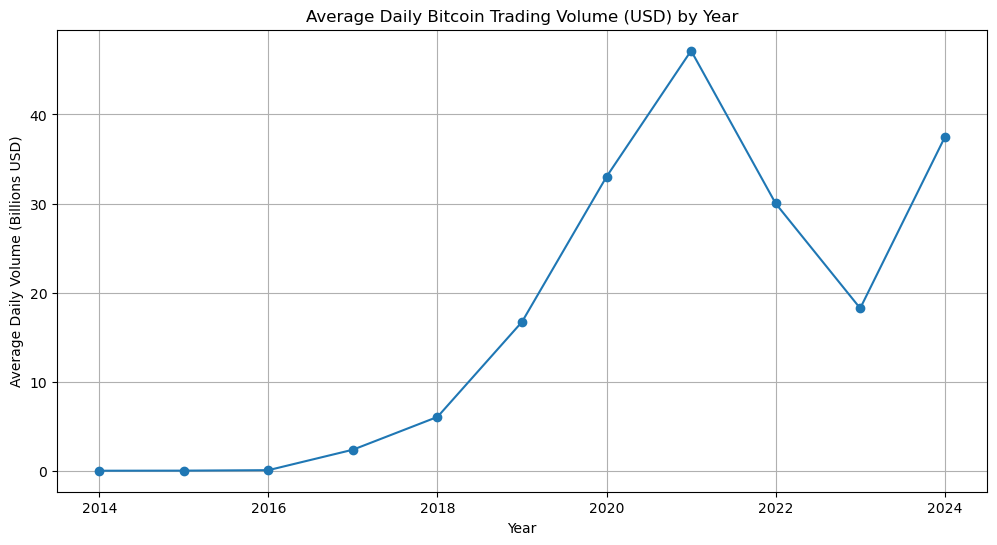

In [66]:
import yfinance as yf

btc = yf.Ticker("BTC-USD")
data = btc.history(start="2024-01-01", end="2025-01-01")

# Use Volume as USD directly
average_daily_volume_usd = data['Volume'].mean()
print(f"Average daily BTC volume in 2024 (USD): ${average_daily_volume_usd:,.2f}")

data = btc.history(start="2014-01-01", end="2025-01-01")

data['Year'] = data.index.year

# Calculate average daily volume per year
avg_volume_per_year = data.groupby('Year')['Volume'].mean()

plt.figure(figsize=(12,6))
plt.plot(avg_volume_per_year.index, avg_volume_per_year.values / 1e9, marker='o')
plt.title("Average Daily Bitcoin Trading Volume (USD) by Year")
plt.xlabel("Year")
plt.ylabel("Average Daily Volume (Billions USD)")
plt.grid(True)
plt.show()
